In [1]:
!pip uninstall xarray
!pip install ecmwflibs
!pip install eccodes
!pip install cfgrib
!pip install xarray
!pip install cartopy

Found existing installation: xarray 2023.7.0
Uninstalling xarray-2023.7.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/xarray-2023.7.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/xarray/*
Proceed (Y/n)? y
  Successfully uninstalled xarray-2023.7.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6942 sha256=23b62c581ada1b1e916810285dd18002f95cf5ce0abd592f1733352f86985ce5
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built findlibs
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.6.1-py3-none-any.whl size=40999 sha256=1fa6336da8e4da05dac6a3dee428d1cce276a6253f7ea71bd873d7e933797dbe
  Stored in directory: /root/.cache/pip/wh

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

In [3]:
members = [
    "gec00", "gep01", "gep02", "gep03", "gep04", "gep05",
    "gep06", "gep07", "gep08", "gep09", "gep10",
    "gep11", "gep12", "gep13", "gep14", "gep15",
    "gep16", "gep17", "gep18", "gep19", "gep20",
    "gep21", "gep22", "gep23", "gep24", "gep25",
    "gep26", "gep27", "gep28", "gep29", "gep30"
]
# ftimes = ["{:03d}".format(i) for i in range(0, 9, 3)]  # forecast times
ftime = "003"
init_date = datetime(2023, 11, 30, 12)  # model initial time, year month date hour
local_dir = f"mslp/{init_date:%Y%m%d%H}"

In [4]:
member = "gep01" # Change the member if needed
filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (latitude: 201, longitude: 225)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 -25.0 -24.75 -24.5 -24.25 ... 24.5 24.75 25.0
  * longitude   (longitude) float64 94.0 94.25 94.5 94.75 ... 149.5 149.8 150.0
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-12-02T04:58 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
data = ds["prmsl"]/100
lons = ds.longitude.values
lats = ds.latitude.values

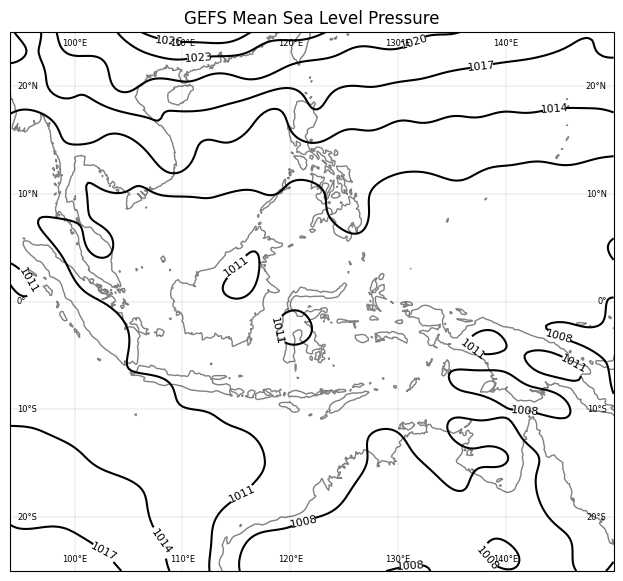

In [24]:
# Initiate figure and axes instance
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data as contour
contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='black')

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
ax.set_title('GEFS Mean Sea Level Pressure')

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.1, color='black', alpha=1, linestyle='--',
                      ypadding=-5, xpadding=-5)
gl.xlines = True
gl.xlabel_style = {'size': 6, 'color': 'black'}
gl.ylabel_style = {'size': 6, 'color': 'black'}
#ax.set_xlabel('Longitude',fontsize=5)
#ax.set_ylabel('Latitude',fontsize=5)

# Save the image
plt.savefig("test_result.png")

Once we are happy with the result, continue to make postage stamp. The concept is the same as spaghetti plot. But in this case we will loop through the members and put them in separate subplots.

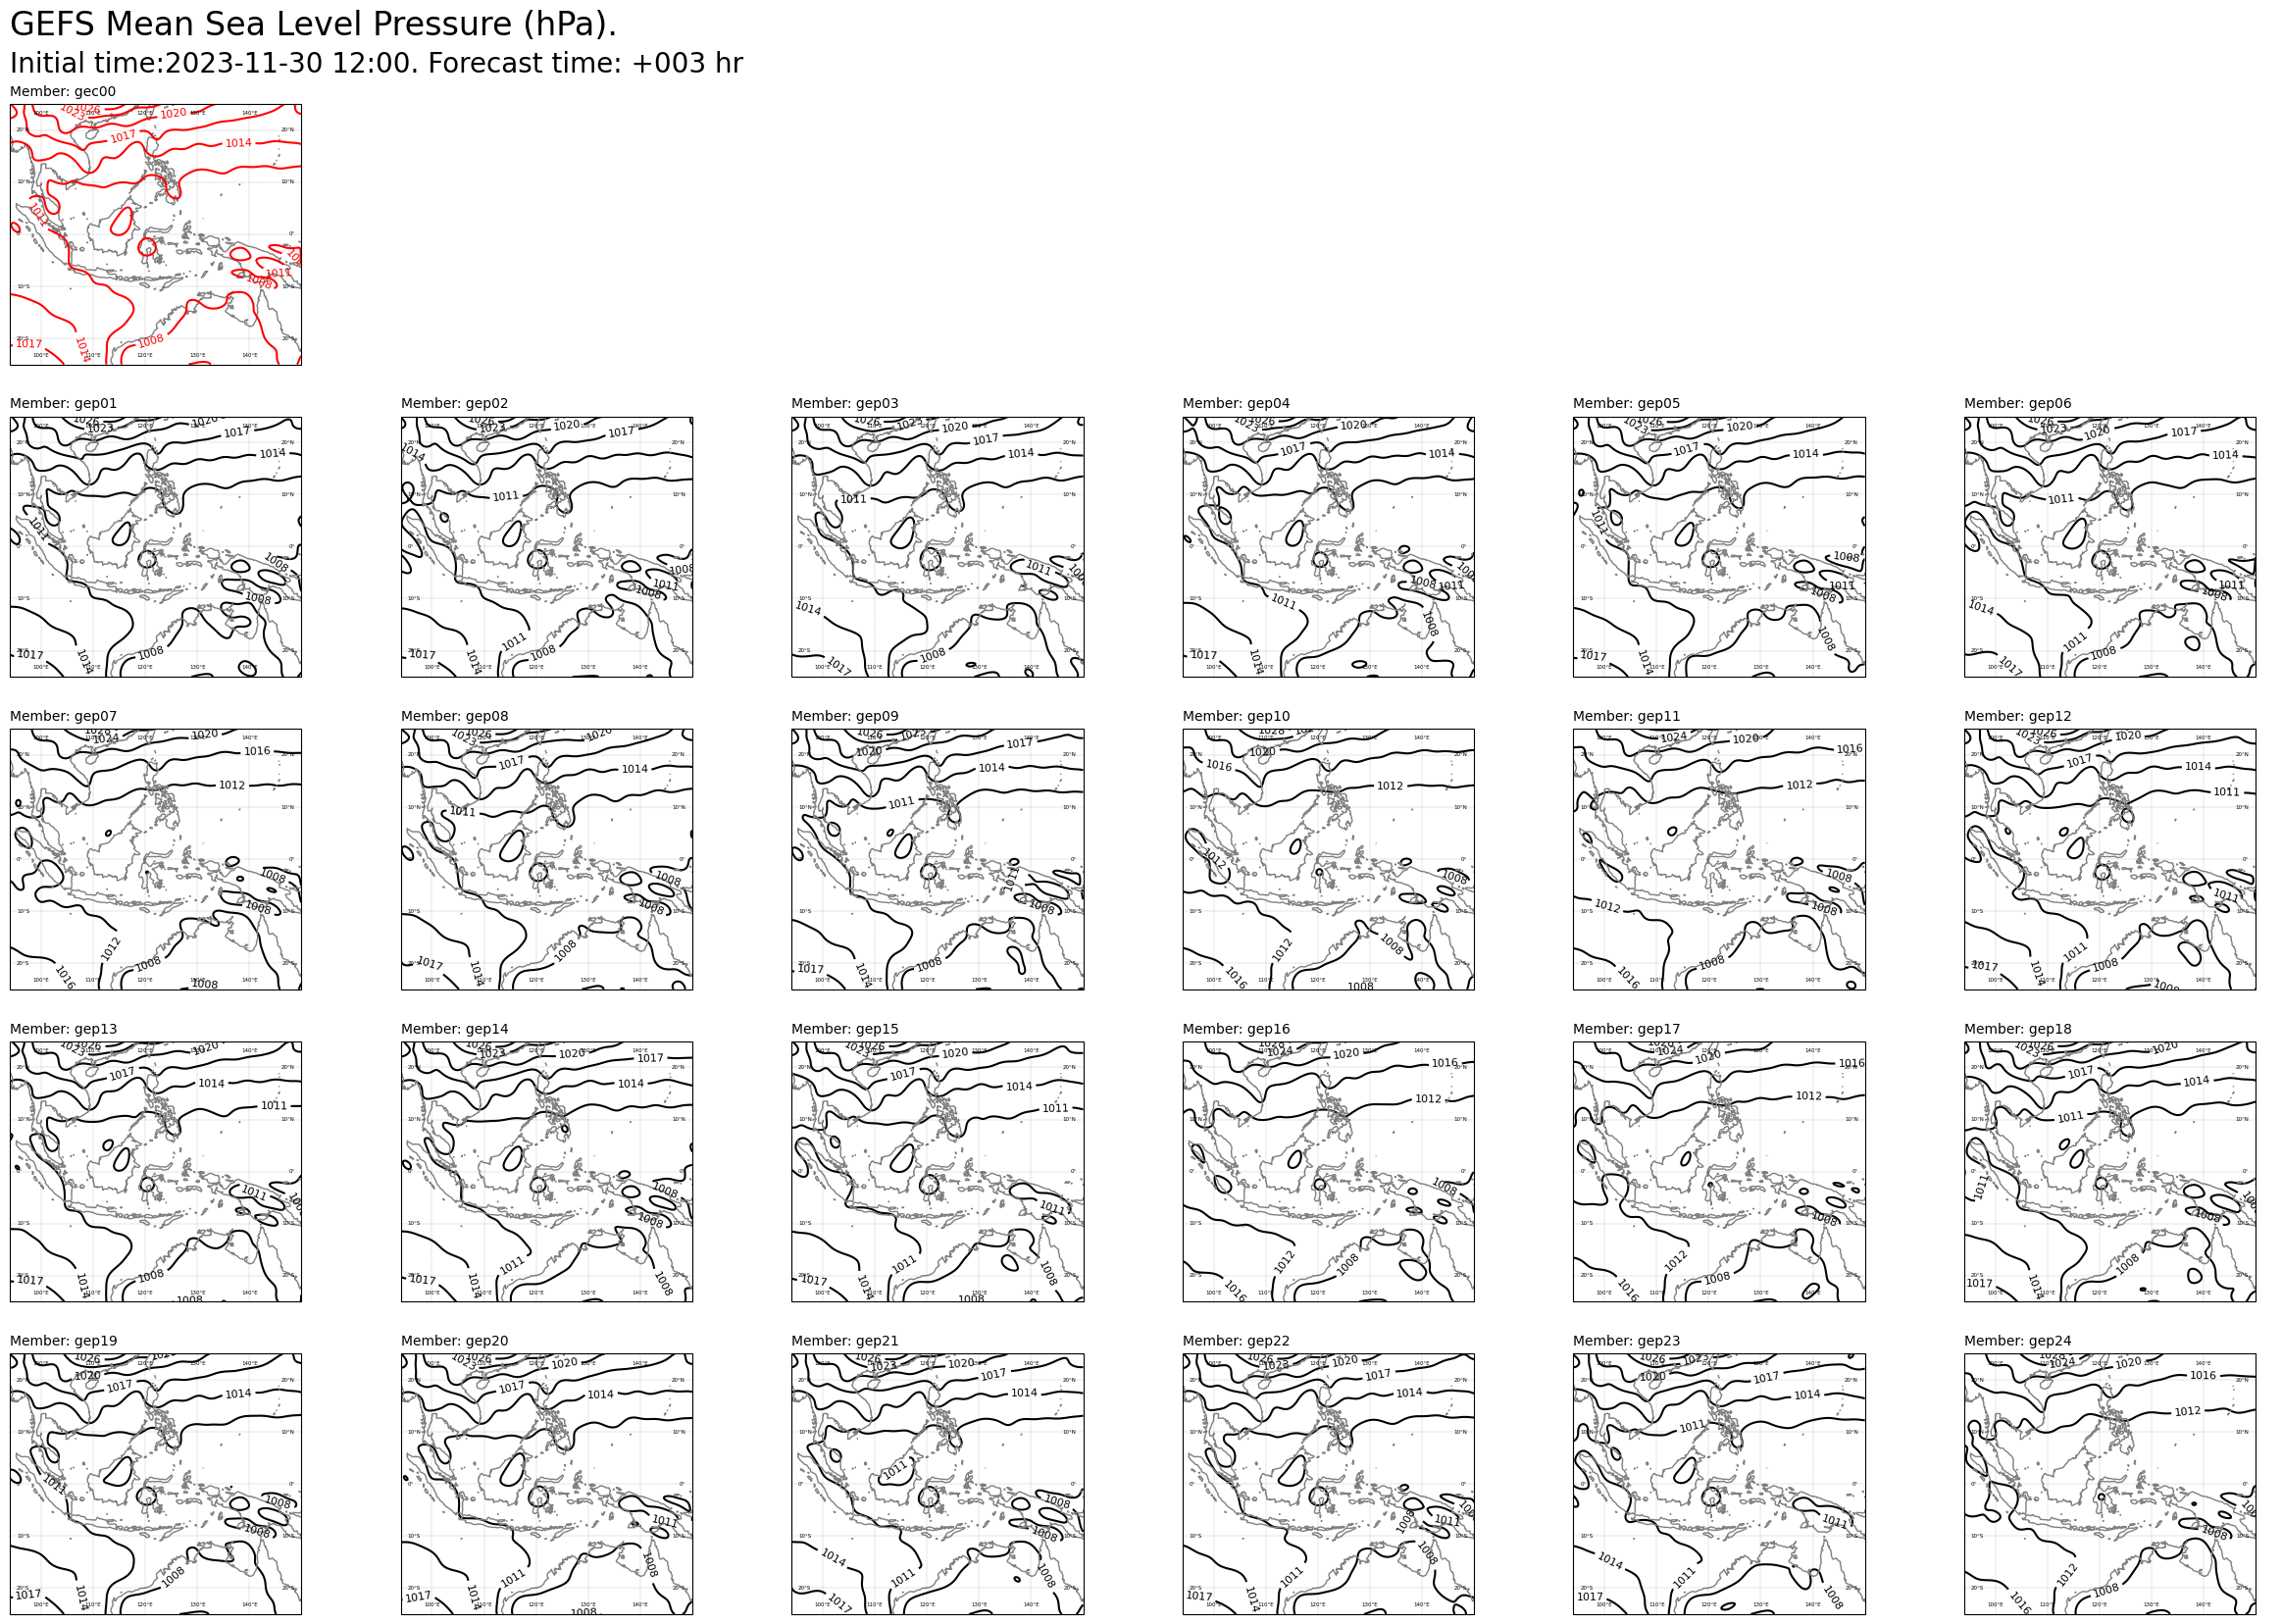

In [43]:
fig, axs = plt.subplots(5, 6, figsize=(30,20),subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

#Clear axes frame
for i in range(1,6):
    axs[i].set_frame_on(False)

# Loop through member
ax_list = [0] + list(range(6, 30))
for member, i in zip(members,ax_list):
  filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
  ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
  data = ds["prmsl"]/100
  lons = ds.longitude.values
  lats = ds.latitude.values

  # Make the control run contour red
  if member == "gec00":
    contour = axs[i].contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='red',zorder=2)
  else:
    contour = axs[i].contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='black',zorder=1)

  # Add contour labels
  axs[i].clabel(contour, inline=True, fontsize=8)
  # Add coastlines
  axs[i].coastlines(color='gray', edgecolor='gray')

  # Add titles
  title = axs[i].set_title(f'Member: {member}',x=0, y=1.0, fontsize=10, ha="left")

  # # Add information text
  # axs[i].text(0, -0.1, f"Initial time:{init_date:%Y-%m-%d %H:%M}. Forecast time: +{ftime} hr", transform=ax.transAxes, fontsize=10, ha="left")

  # Add gridlines and labels
  gl = axs[i].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.1, color='black', alpha=1, linestyle='--',
                        ypadding=-5, xpadding=-5)
  gl.xlines = True
  gl.xlabel_style = {'size': 4, 'color': 'black'}
  gl.ylabel_style = {'size': 4, 'color': 'black'}

title_text1 = f"GEFS Mean Sea Level Pressure (hPa)."
title_text2 = f"Initial time:{init_date:%Y-%m-%d %H:%M}. Forecast time: +{ftime} hr"
axs[0].text(0, 1.3, title_text1, fontsize=24, ha='left', va='center', transform=axs[0].transAxes)
axs[0].text(0, 1.15, title_text2, fontsize=20, ha='left', va='center', transform=axs[0].transAxes)

# plt.suptitle(f"GEFS Mean Sea Level Pressure (hPa). Initial time:{init_date:%Y-%m-%d %H:%M}. Forecast time: +{ftime} hr", ha="left", fontsize=20)
plt.savefig(f"mslp_{init_date:%Y%m%d%H}_{ftime}.png",dpi=200,bbox_inches='tight')

Now it's your turn!
1. Loop through the forecast time to make the plot from all the forecast times.